# **CHARGEMENT ET PRETRAITEMENT DES AUDIO**

In [ ]:
!pip install noisereduce

In [ ]:
import librosa
import noisereduce as nr
import numpy as np
import os
import IPython.display as ipd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.io.wavfile import write
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

*Charger tous les audio*

In [ ]:
!pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import librosa
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift

# Dossier contenant les données audio initiales
input_dir = ("/content/drive/My Drive/dataset_aa/dataset")

output_dir = ("/content/drive/My Drive/dataset_aa/Augmented")
os.makedirs(output_dir, exist_ok=True)

# Paramètres d'augmentation
augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5)
])

# Lire les fichiers audio et appliquer les augmentations
file_paths = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.wav')]
total_original_files = len(file_paths)
augmentation_factor = 5  # Nombre d'augmentations par fichier audio
target_count = 8000  # Nombre total de fichiers souhaités

augmented_count = 0
for idx, file_path in enumerate(file_paths):
    audio, sr = librosa.load(file_path, sr=None)
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    for i in range(augmentation_factor):
        augmented_audio = augmentations(samples=audio, sample_rate=sr)
        output_file = os.path.join(output_dir, f"{file_name}_augmented_{i}.wav")
        write(output_file, sr, augmented_audio.astype('float32'))
        augmented_count += 1

        # Arrêter si le nombre de fichiers souhaité est atteint
        if total_original_files + augmented_count >= target_count:
            break
    if total_original_files + augmented_count >= target_count:
        break

print(f"Augmentation terminée. Nombre total de fichiers: {total_original_files + augmented_count}")

Augmentation terminée. Nombre total de fichiers: 8000


In [6]:
def charger_dossier_audio(chemin_dossier, chemin_augmented):

    fichiers_audio = os.listdir(chemin_dossier)
    fichiers_audio_aug = os.listdir(chemin_augmented)

    liste_audio = []
    liste_sr = []
    fichiers = []

    for fichier in fichiers_audio:
      # Ignore hidden files
        if fichier.startswith('.'):
            continue
        chemin_fichier = os.path.join(chemin_dossier, fichier)
        audio, sr = librosa.load(chemin_fichier, sr=None) # sr=None pour conserver le taux d'échantillonnage d'origine
        liste_audio.append(audio)
        liste_sr.append(sr)
        fichiers.append(fichier)

    for fichier in fichiers_audio_aug:
      # Ignore hidden files
        if fichier.startswith('.'):
            continue
        chemin_fichier = os.path.join(chemin_augmented, fichier)
        audio, sr = librosa.load(chemin_fichier, sr=None) # sr=None pour conserver le taux d'échantillonnage d'origine
        liste_audio.append(audio)
        liste_sr.append(sr)
        fichiers.append(fichier)


    return liste_audio, liste_sr, fichiers

In [ ]:
# Fonction pour afficher l'onde sonore
def afficher_onde_sonore(audio, sr, labels):
  plt.figure(figsize=(18, 9))
  for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.plot(audio[i])
    plt.title(f"Chiffre {labels[i]}")
    plt.xlabel("Temps")
    plt.ylabel("Amplitude")
  plt.show()

In [7]:
chemin_dossier = ("/content/drive/My Drive/dataset_aa/dataset")
chemin_augmented = ("/content/drive/My Drive/dataset_aa/Augmented")

labels = []

# Charger tous les audios
audio, sr, fichiers = charger_dossier_audio(chemin_dossier, chemin_augmented)

# recupérér et melanger les fichier audio
random.shuffle(fichiers)

# Recuperer les labels
for fichier in fichiers:
  label = int(fichier[0])
  labels.append(label)

# Affichage
for i in range(len(labels)):
  print(labels[i], fichiers[i])
print(len(labels))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
9 9_Franckchiffre_92_augmented_1.wav
0 0_2024-05-30_160929017.wav
2 2_2024-05-30_161908813_augmented_4.wav
2 2K2_2024-05-30_125037041_augmented_0.wav
8 8T3_2024-05-30_130631092_augmented_0.wav
0 0_Stephanechiffre_01_augmented_2.wav
7 7E2_2024-05-30_115000969_augmented_2.wav
6 6_2024-05-31_103342674_augmented_0.wav
7 7_2024-05-31_111655745_augmented_1.wav
9 9_2024-05-30_161518116_augmented_0.wav
0 0 Josiane 1_augmented_1.wav
2 2_2024-05-31_114432122_augmented_3.wav
5 5 Josiane 2_augmented_4.wav
5 5_2024-05-31_065224824_augmented_1.wav
9 9 champlain 2_augmented_3.wav
7 7_2024-05-30_164753921_augmented_4.wav
6 6 Abadouma 3_augmented_1.wav
5 5_2024-05-30_162624999_augmented_1.wav
1 1_NKWChiffre_12.wav
5 5J1_2024-05-31_102142625_augmented_1.wav
7 7_2024-05-31_114336907_augmented_2.wav
8 8_2024-05-31_081020164_augmented_0.wav
9 9_2024-05-30_161518116_augmented_4.wav
9 9_chiffre_91_augmented_4.wav
6 6_2024-05-31_115

In [8]:
# Affichage
for i in range(6):
  print(fichiers[i], labels[i])

ipd.Audio(str(os.path.join(chemin_augmented, fichiers[i])))

6_2024-05-30_161828674_augmented_4.wav 6
3F3.wav 3
3_2024-05-31_102008946_augmented_3.wav 3
9_2024-05-31_112247238_augmented_1.wav 9
7_2024-05-31_071332894_augmented_3.wav 7
0 Ashley 1_augmented_4.wav 0


*PRETRAITEMENT DES AUDIOS: normalisation et suppression des bruits*

La normalisation des données présente plusieurs avantages: l'uniformité des niveaux sonores, l'amélioration de la qualité des caractéristiques, la stabilité du modèle

In [33]:
def Normaliser_audios(liste_audio):

    liste_audio_normalisee = []
    for audio in liste_audio:
        audio_normalise = librosa.util.normalize(audio)
        liste_audio_normalisee.append(audio_normalise)

    return liste_audio_normalisee

audio = Normaliser_audios(audio)

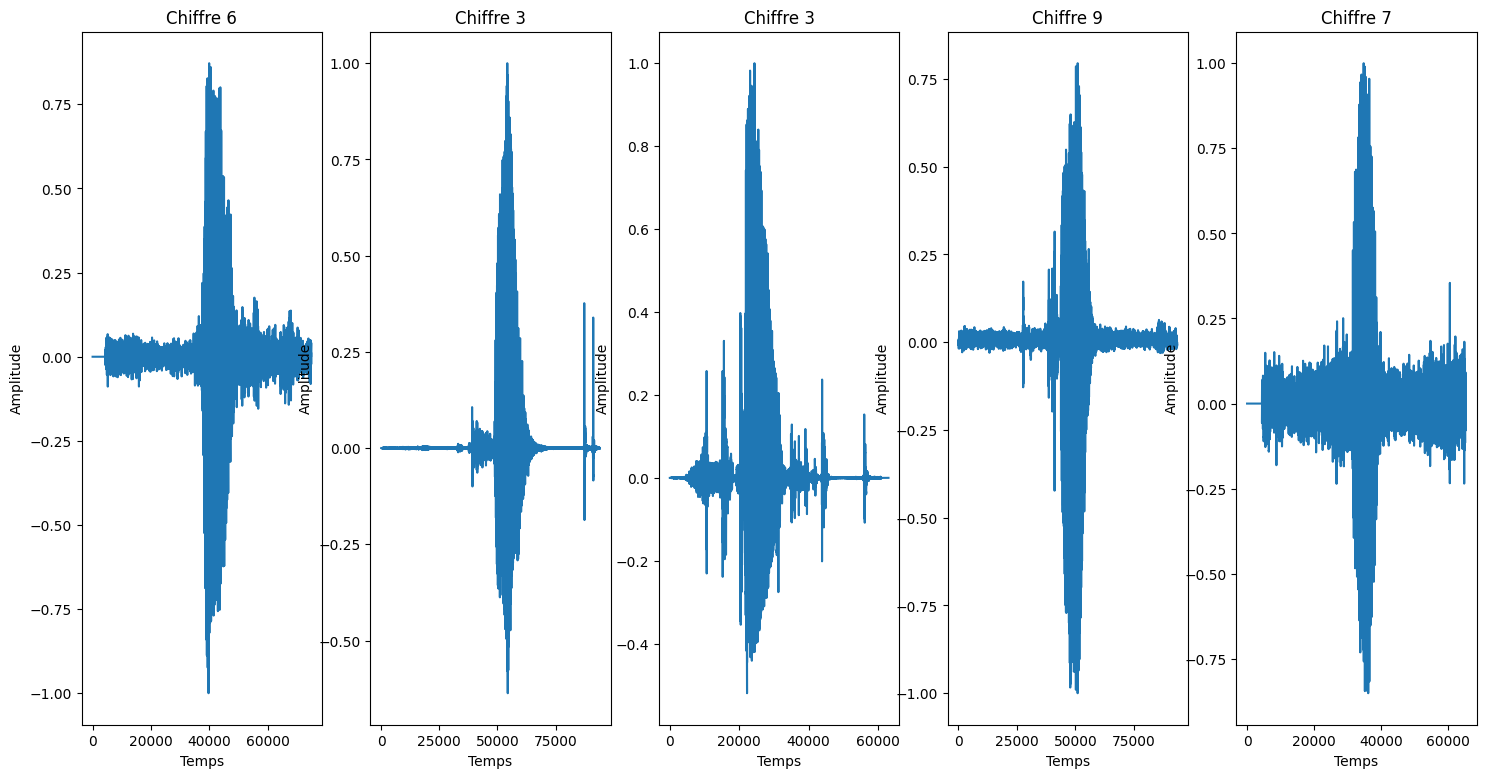

In [34]:
afficher_onde_sonore(audio, sr, labels)

La suppression des bruits se fera avec la bibliothèque noicereduce pour plusieurs raisons:
- Librosa ne propose pas de fonctionnalités avancées de réduction de bruit par défaut.
- Librosa est plus orientée vers l'analyse et la transformation que vers le prétraitement audio comme la réduction de bruit.
- Noicereduce est spécialisée dans la réduction de bruit, offrant des algorithmes performants pour cette tâche.
- Elle propose des fonctionnalités simples et efficaces pour le prétraitement audio

In [35]:
def supprimer_bruit(liste_audio, liste_sr, fichiers):
    clean_audio = []
    path = []
    output_folder = "/content/drive/My Drive/data_traite"

    # Vérifier si le dossier de sortie existe, sinon le créer
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for audio, sr, f in zip(liste_audio, liste_sr, fichiers):
        # Retirer les moments de silence en début et à la fin de l'audio
        audio_trim, _ = librosa.effects.trim(audio, top_db=20)

        # Appliquer la réduction de bruit
        audio_denoised = nr.reduce_noise(y=audio_trim, sr=sr)

        clean_audio.append(audio_denoised)

        # Conserver uniquement le nom du fichier sans le chemin complet
        file_name = os.path.basename(f)
        output_path = os.path.join(output_folder, file_name)
        path.append(output_path)

        # Enregistrer l'audio nettoyé dans un fichier WAV
        #write(output_path, sr, audio_denoised.astype('float32'))

    return clean_audio, path

In [36]:
clean_audio, path =  supprimer_bruit(audio,sr,fichiers)

In [ ]:
# Affichage
random.shuffle(path)
for i in range(6):
  print(path[i])

ipd.Audio("/content/drive/My Drive/data_traite/7_NKWChiffre_72.wav")

/content/drive/My Drive/data_traite/9F.wav
/content/drive/My Drive/data_traite/7_2024-05-30_163221067.wav
/content/drive/My Drive/data_traite/9_2024-05-30_164429503.wav
/content/drive/My Drive/data_traite/1T3_2024-05-30_130210490.wav
/content/drive/My Drive/data_traite/9_2024-05-31_111718696.wav
/content/drive/My Drive/data_traite/4_2024-05-31_112132436.wav


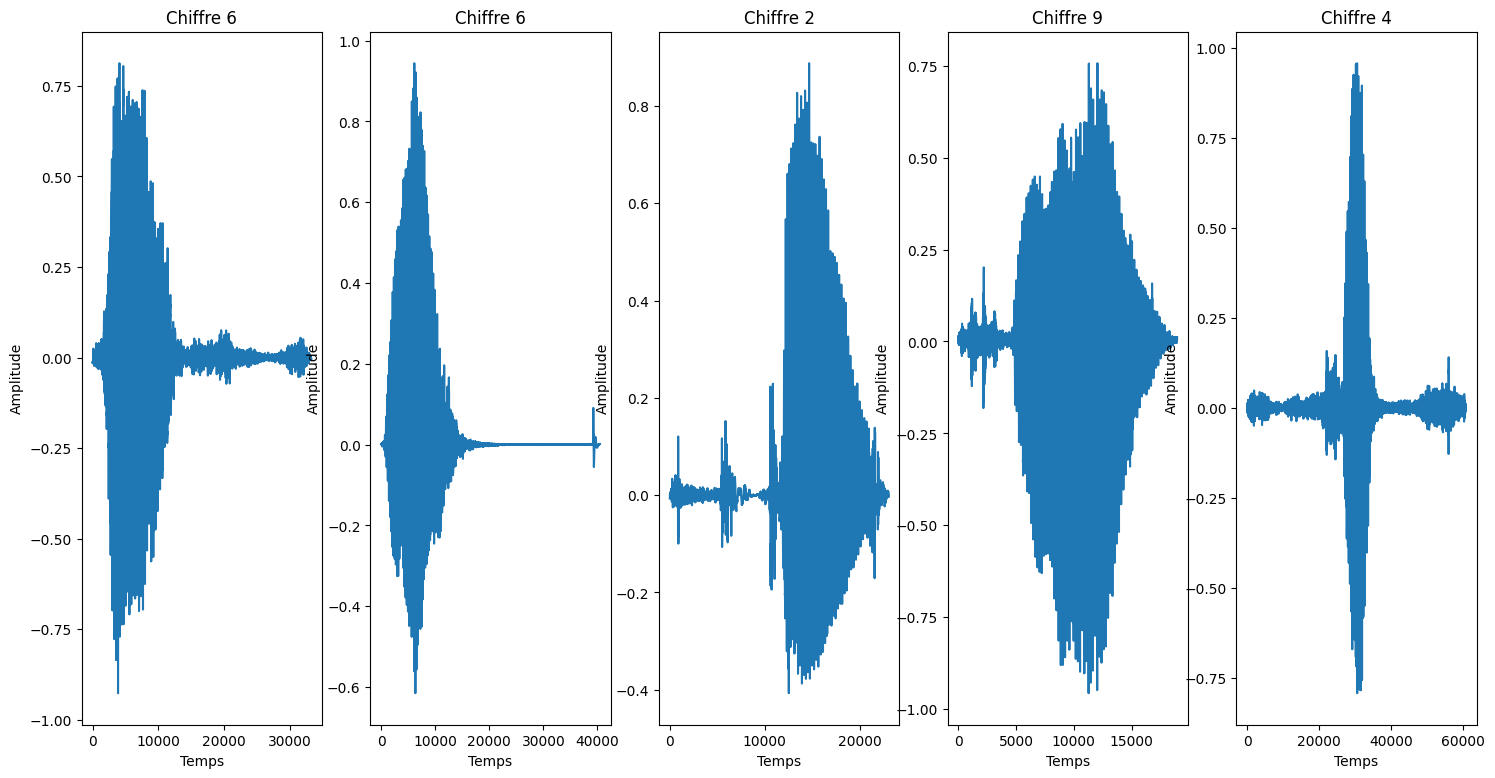

In [ ]:
afficher_onde_sonore(clean_audio, sr, labels)

#**Extraire les fonctionnalités d'un fichier audio | MFCC |**
Les MFCC (Coefficients Cepstraux Mel-Fréquence) sont des coefficients qui représentent les caractéristiques spectrales du signal audio.. Il s'agit d'une technique d'extraction de caractéristiques largement utilisée dans le domaine du traitement du signal audio, en particulier pour des tâches telles que l'analyse, la reconnaissance et la classification de la parole et de la musique. Les MFCC sont dérivés des caractéristiques spectrales d’un signal audio et sont conçus pour imiter la perception du son par le système auditif humain.

In [9]:
def extraire_mfccs(clean_audio, liste_sr, n_mfcc=40):
    mfcc_audios = []

    for audio, sr in zip(clean_audio, liste_sr):
        # Vérifier si audio est un tableau numpy
        if isinstance(audio, np.ndarray):
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)  # n_mfcc est le nombre de coefficients MFCC à extraire

            # Calculer les moyennes des MFCCs pour obtenir un vecteur de taille fixe
            mfccs = np.mean(mfccs.T, axis=0)
            mfcc_audios.append(mfccs)
        else:
            raise ValueError("Chaque segment audio doit être un tableau numpy")

    return mfcc_audios



In [37]:
mfcc_audios = extraire_mfccs(clean_audio, sr)

In [12]:
mfcc_audios[0].shape

(40,)

In [ ]:
#On visualise le resultat du MFCC
num=6
plt.figure(plt.figure(figsize=(20, 15)))
for i in range(6):
    plt.subplot(2,3,i+1)
    librosa.display.specshow(mfcc_audios[i])
    plt.title(f"label {labels[i]}")

# **OBSERVATIONS ET LABELS**

In [38]:
# Convertir les listes en tableaux numpy
X = np.array(mfcc_audios)
y = np.array(labels)

print(X.shape)
print(y.shape)

(8000, 40)
(8000,)


Division des données en Train-Valid-Test

In [39]:
# Diviser les données en ensembles d'entraînement et de test

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.30, random_state=42)

#Diviser les données de test en ensemble de test et de validation
X_valid, X_test, y_valid, y_test= train_test_split(X_tmp, y_tmp, test_size=0.2/0.30, random_state=42)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(5600, 40)
(799, 40)
(1601, 40)


**One hot Encoding**

In [40]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(5600, 10)
(799, 10)
(1601, 10)


In [23]:
for i in range(3):
    print(y_train[i])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# **Conception du modèle**

In [24]:
# Instantiation et construction du modèle.

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Display the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5248      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

#### COMPILATION DU MODELE

In [25]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### TRAIN THE MODEL

In [50]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

training_results = model.fit(X_train,
                             y_train,
                             epochs=80,
                             batch_size=64,
                             validation_data=(X_valid, y_valid),
                             callbacks=[reduce_lr]);

Epoch 1/80
88/88 [==============================] - 2s 17ms/step - loss: 2.1470 - accuracy: 0.2093 - val_loss: 2.3021 - val_accuracy: 0.1489 - lr: 0.0010
Epoch 2/80
88/88 [==============================] - 1s 12ms/step - loss: 2.1517 - accuracy: 0.2062 - val_loss: 2.3087 - val_accuracy: 0.1477 - lr: 0.0010
Epoch 3/80
88/88 [==============================] - 1s 8ms/step - loss: 2.1512 - accuracy: 0.2070 - val_loss: 2.3111 - val_accuracy: 0.1427 - lr: 0.0010
Epoch 4/80
88/88 [==============================] - 1s 8ms/step - loss: 2.1547 - accuracy: 0.2023 - val_loss: 2.2942 - val_accuracy: 0.1402 - lr: 0.0010
Epoch 5/80
88/88 [==============================] - 1s 6ms/step - loss: 2.1552 - accuracy: 0.2082 - val_loss: 2.3027 - val_accuracy: 0.1452 - lr: 0.0010
Epoch 6/80
88/88 [==============================] - 0s 5ms/step - loss: 2.1409 - accuracy: 0.2114 - val_loss: 2.3079 - val_accuracy: 0.1402 - lr: 0.0010
Epoch 7/80
88/88 [==============================] - 0s 5ms/step - loss: 2.1524 -

Define a utility functio to plot the result

In [51]:
#Visualisation des résultats de l'entrainement
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 80])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

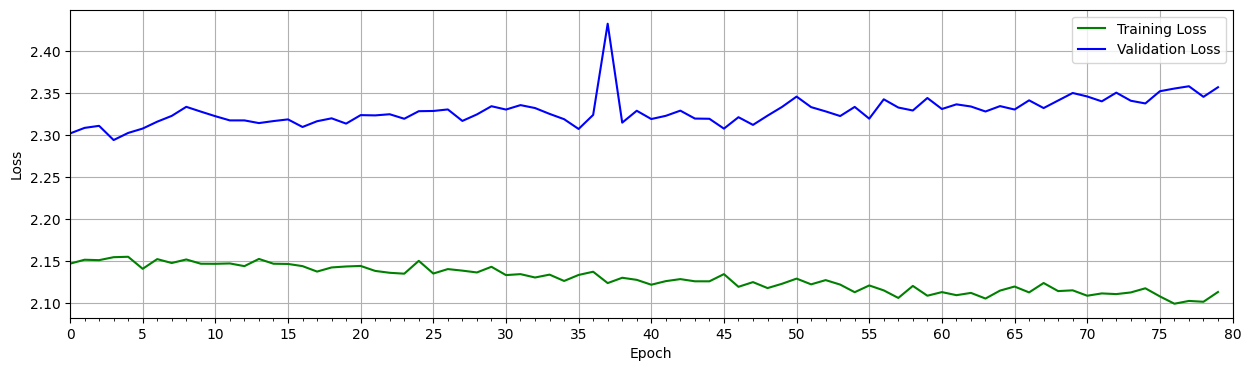

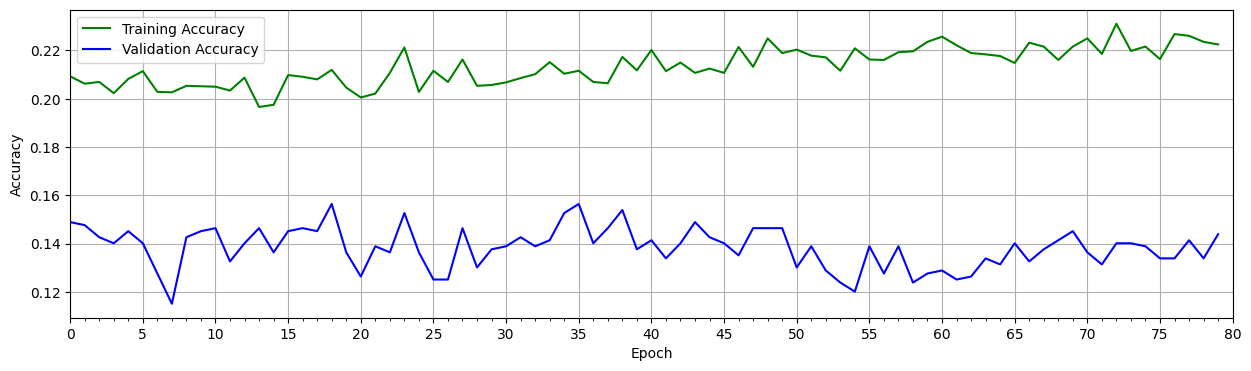

In [52]:
#Visualisation de la Loss et de l'Accuracy
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [53]:
train_acc[-1], valid_acc[-1]

(0.2224999964237213, 0.14392991364002228)

Making predictions on sample Test Images

In [54]:
predictions = model.predict(X_test)
index = 0
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

51/51 [==============================] - 0s 2ms/step
Ground truth for test digit:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Predictions for each class:

digit: 0  probability:  0.06933311
digit: 1  probability:  0.098404415
digit: 2  probability:  0.066250615
digit: 3  probability:  0.055023436
digit: 4  probability:  0.050898477
digit: 5  probability:  0.10289582
digit: 6  probability:  0.12456726
digit: 7  probability:  0.17194673
digit: 8  probability:  0.11661471
digit: 9  probability:  0.14406544


In [31]:
# generation de la prediction pour les données test
predictions = model.predict(X_test)

# pour chaque image des données test on selectionne la classe avec la plus grande probabilité
predicted_labels = [np.argmax(i) for i in predictions]

51/51 [==============================] - 0s 2ms/step


In [32]:
for i in range(10):
    print (f"Valeur vraie : {y_test[i]} ---- Valeur prédite : {predicted_labels[i]}")

Valeur vraie : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ---- Valeur prédite : 9
Valeur vraie : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] ---- Valeur prédite : 6
Valeur vraie : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] ---- Valeur prédite : 9
Valeur vraie : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] ---- Valeur prédite : 0
Valeur vraie : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] ---- Valeur prédite : 9
Valeur vraie : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] ---- Valeur prédite : 9
Valeur vraie : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] ---- Valeur prédite : 7
Valeur vraie : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] ---- Valeur prédite : 5
Valeur vraie : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] ---- Valeur prédite : 7
Valeur vraie : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] ---- Valeur prédite : 6


##### Csnfusion Matrix

In [56]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)

# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

51/51 [==============================] - 0s 2ms/step


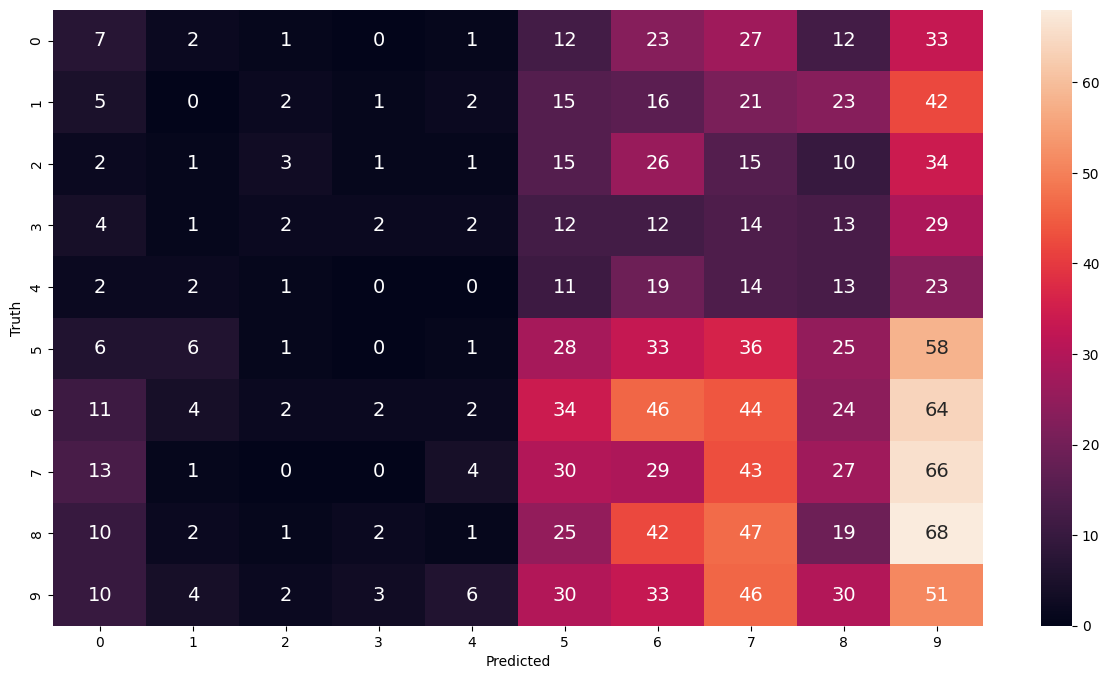

In [55]:
y_test_integer_labels = tf.argmax(y_test, axis=1)

# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()